<a href="https://colab.research.google.com/github/lilyrausser/DS/blob/main/10Y_CHD_IEOR142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [ ]:
training_data = pd.read_csv('framingham_train.csv')
training_data


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,41,Some high school,1,43,0,0,1,0,306,199.0,106.0,38.75,100,75,0
1,0,38,High school/GED,1,15,0,0,0,0,176,110.0,80.0,24.03,100,113,0
2,1,42,High school/GED,1,9,0,0,0,0,205,110.0,73.0,22.40,61,66,0
3,0,42,High school/GED,0,0,0,0,1,0,263,150.0,88.0,23.68,96,78,0
4,0,53,High school/GED,0,0,0,0,1,0,272,146.0,89.0,25.50,73,67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,1,39,Some high school,1,40,0,0,0,0,209,134.0,82.0,28.34,70,75,0
2556,0,52,Some high school,0,0,0,0,0,0,292,125.0,87.0,31.92,75,67,0
2557,1,39,Some high school,0,0,0,0,0,0,188,105.0,65.0,22.85,63,76,0
2558,1,49,High school/GED,1,50,0,0,0,0,252,156.0,91.0,25.35,70,114,1


In [ ]:
test_data = pd.read_csv('framingham_test.csv')

Question 2a i

Using the fitted logistic regression model, we will estimate TenYearCHD in relation to the independent features added below: (using all featuers from the table)

In [ ]:

logreg = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                       data = training_data).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.365281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                  0.1331
Time:                        20:25:17   Log-Likelihood:                -935.12
converged:                       True   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 5.181e-51
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

*Question* 2a ii

Based on the results from the logistic regression above, we can see that gender (male) (based on participant being male or not), age, cigsPerDay, sysBP and glucose are the independent variables with the highest significance in relation to the dependent variable 'TenYearCHD'. I determined this based on the values with the lowest P>|z| value (value closest to zero) and highest z value.

For example, current smokers have a higher risk of developing CHD compared to non-smokers. Smokers are e^(0.1539) = 1.2 times more likely to develop TenYearCHD compared to non-smokers.


Question 2a iii

In [ ]:
#identify threshold value of p (pbar) where it is optimal to prescribe the medication to a patient onlif if their 10 year CHD exceeds pbar
#confusion about how to identify Pbar: explanation?model?math?


To find pbar, we need to determine:

E[cost of medication prescription]= E[cost of no medication prescription]



**step 1** (0.10p)*(910,000) + p*(825,000) = 1-(0.10p)*(85,000) + (1-p)*0
**step 2** 91,000p + 825,000p = 76,500
**step 3** 916,000p = 76,500
**step 4** p bar = 0.0835

Therefore, if risk for TenYearCHD >= p bar, then medication should not be prescribed because we do not want the cost of not prescribing medication to be greater than the cost of prescribing medication.


Question 2a iv

Describing the test set performance of the logistic regression model using the threshold pbar that was determined in the prior question:

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:

p = 0.0835
y_test = test_data.drop('TenYearCHD', axis = 1)
y_prob = logreg.predict(y_test)
y_pred = pd.Series([1 if x >= p else 0 for x in y_prob], index=y_prob.index)
cm = confusion_matrix(test_data['TenYearCHD'], y_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[410 513]
 [ 32 143]]


Calculating TPR, FPR:

TPR is a calculation that is used to understand the true positive rate. It is defined by the function of all of the true positives (people who have CHD testing accurately positive for it, a correct diagnosis), divided by the total number of people who actually have the disease but may have been falsely informed that they dont have it (true positives and false negatives).

FPR calculates the false positive rate, with false positives, the total number of people who test positive for CHD but do not have CHD, divided by the total number of people who do not have CHD. The latter is a combination of false positives and true negatives, those who do not have CHD and correctly tested negative for it.

In [ ]:
accuracy = (cm.ravel()[0] + cm.ravel()[3]) / sum(cm.ravel()) #(TP + TN) / (TP+FP+TN+FN)
TPR = cm.ravel()[3] / (cm.ravel()[3] + cm.ravel()[2]) #TP/(TP+FN)
FPR = cm.ravel()[1] / (cm.ravel()[1] + cm.ravel()[0]) #FP/(FP+TN)

print('Accuracy: ' + str(round(accuracy, 3)))
print('TPR: ' + str(round(TPR, 3)))
print('FPR: ' + str(round(FPR, 3)))

Accuracy: 0.504
TPR: 0.817
FPR: 0.556


Question 2a V

In [ ]:
print(cm.ravel()[0])
print(cm.ravel()[3])
print(cm.ravel()[1])
print(cm.ravel()[2])

410
143
513
32


For the first part of this question, we will assume that the CHD outcomes in the test set are not affected by the treatment decision:

In [ ]:

#CHD outcomes in test set not affected by treatment decision
TP = 410
TN = 143
FP = 513
FN = 32

#economic cost per patient
cost_per_patient = ((910000*TP)  + (85000*FP) + (825000*FN) + (0*TN)) / (TP+FP+FN+TN)
round(cost_per_patient, 1)


403556.5

We cannot make the assumption we made above because the goal of prescribing medication is to reduce the possibility of developing CHD. In this case we need to create an adjusted economic cost per patient that would assume 90% of patients with medication would not develop CHD and the cost of the 90% of positive samples would decrease from 910000 to 85000 due to the positive effects of the medication reducing their CHD.

The new equation would look like:

In [ ]:

#CHD outcomes in test set not affected by treatment decision
TP = 410
TN = 143
FP = 513
FN = 32

#Adjusted cost
adjusted_cost_per_patient = ((910000 * (0.1 * TP)) + (85000*(FP+(0.9*TP))) + (825000*FN))/ (TP+FP+FN+TN)
round(adjusted_cost_per_patient, 2)

126302.37

We can now see that the adjusted cost per patient is much lower than the initial economic cost per patient when assuming the medicine reduces the chance of getting CHD.

Question 2a vi

Here we will predict a simple baseline model that none of the patients are at high risk for CHD and as a result will not be recommended treatment for any of the patients.

In [ ]:
#print("Confusion Matrix : \n", cm)
#TP+FP
#FPR = FP/(FP+TN)
##TPR = TP/(TP+FN)
#TPR

pred = [0]*test_data.shape[0]
cm_base = confusion_matrix(test_data['TenYearCHD'], pred)
print ("Confusion Matrix : \n", cm_base)


Accuracy_base = (0+923) / sum(cm_base.ravel())
TPR_base = cm_base.ravel()[3] / (cm_base.ravel()[2] + cm_base.ravel()[3])
FPR_base = cm_base.ravel()[1] / (cm_base.ravel()[1] + cm_base.ravel()[2])
print('Accuracy: ' + str(round(Accuracy_base, 2)))
print('TPR: ' + str(round(TPR_base, 2)))
print('FPR: ' + str(round(FPR_base, 2)))


TN_base = 923
FN_base = 175

##cost_base_per_patient = (FN_base*(825000) + TN_base*(0)) / (TN_base*FN_base)
#round(cost_base_per_patient, 2)

Confusion Matrix : 
 [[923   0]
 [175   0]]
Accuracy: 0.84
TPR: 0.0
FPR: 0.0


Based on the results, we can see that 923 people in the test set did not develop CHD and 175 people in the test set did develop CHD. As a result, we can find the expepected economic cost per patient as:

In [ ]:
cost_base_per_patient = (FN_base*(825000) + TN_base*(0)) / (TN_base*FN_base)
round(cost_base_per_patient, 2)

893.82

Question 2a vii

In [ ]:
example_setting = {'male': [0],
                   'age' : 45,
                   'education' : ['College'],
                   'currentSmoker' : [1],
                   'cigsPerDay' : [18],
                   'BPMeds' : [1],
                   'prevalentStroke' : [0],
                   'prevalentHyp' : [1],
                   'diabetes' : [1],
                   'totChol' : [240],
                   'sysBP' : [140],
                   'diaBP' : [90],
                   'BMI' : [36],
                   'heartRate' : [72],
                   'glucose' : [105]

                   }

new_logreg = logreg.predict(pd.DataFrame(data = example_setting))
print(new_logreg)
print(new_logreg > p)

0    0.129771
dtype: float64
0    True
dtype: bool


Because our prediction value of 0.129771 (developing CHD in the next 10 years) is greater than the p value we created from part iii of this question, we can prescribe medication to the new patient.

Question 2b

Here is the ROC curve for the logistic regression model on the test set:

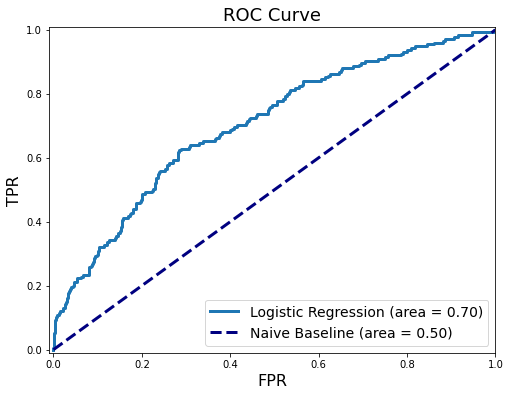

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds  = roc_curve(test_data['TenYearCHD'], y_prob)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

The ROC curve above shows a combination of FPR and TPR values. The curve may be helpful to decision makers looking to further the study of medication and preventing CHD because it helps us learn the best threshold point to maximize TP and FP; helping diagnosis happen quicker.

One interesting thing about the model is that the ROC curve (light blue line) is above the baseline (dark blue dotted line) which means that the curve performs better than the baseline (good information).

From the legend of the curve, we can see that the AUC has good discriminative ability between logisitc regression and naive baseline at 0.7.

Question 2c

Step 1)
((C + 550000) * (0.1p)) + (C *(1-(0.1p))) = 550000p

results in:
C = 495000p




Step 2) plug in p to find c:

p = 0.0835

C = 495000 * 0.0835 = $41,332.5

Therefore, C should be valued at 41,332.5 for the insurance company to charge as a co-payment for the medication in order for the patients to 'self select' in a manner that is consistent with the previously examined 'optimal strategy' discussed in part a.




Question 2d


An aspect of the analysis performed thus far that raised an ethical concern was the aspect that there is a fixed cost for decreased quality of life ($550000) for developing CHD. This fixed cost is arbitrary and we will never be able to create a set cost because life quality can be quantified differently.

In order to address this concern, there should be multiple different types of people from different types of backgrounds considered as subjects. This way, people can categorize themselves into different backgrounds and identify themselves rather than there being one blanket option; new adjusted p values would be created in order to calculate different thresholds relative to the patients individual categorization.